<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span></li><li><span><a href="#Clean-&amp;-Explore-Data" data-toc-modified-id="Clean-&amp;-Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean &amp; Explore Data</a></span><ul class="toc-item"><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Null Values</a></span></li><li><span><a href="#Negative-Demand" data-toc-modified-id="Negative-Demand-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Negative Demand</a></span></li><li><span><a href="#Datetime" data-toc-modified-id="Datetime-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Datetime</a></span></li></ul></li><li><span><a href="#EDA-&amp;-More-Cleaning" data-toc-modified-id="EDA-&amp;-More-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA &amp; More Cleaning</a></span><ul class="toc-item"><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Product Demand</a></span></li><li><span><a href="#Annual-Trends" data-toc-modified-id="Annual-Trends-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Annual Trends</a></span></li><li><span><a href="#Warehouse-Demand" data-toc-modified-id="Warehouse-Demand-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Warehouse Demand</a></span></li><li><span><a href="#Products" data-toc-modified-id="Products-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Products</a></span><ul class="toc-item"><li><span><a href="#Product-Count" data-toc-modified-id="Product-Count-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Product Count</a></span></li><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Product Demand</a></span></li><li><span><a href="#Top-100" data-toc-modified-id="Top-100-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Top 100</a></span></li><li><span><a href="#Top-50" data-toc-modified-id="Top-50-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Top 50</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Top-Product" data-toc-modified-id="Top-Product-4.4.6"><span class="toc-item-num">4.4.6&nbsp;&nbsp;</span>Top Product</a></span><ul class="toc-item"><li><span><a href="#Warehouse-J" data-toc-modified-id="Warehouse-J-4.4.6.1"><span class="toc-item-num">4.4.6.1&nbsp;&nbsp;</span>Warehouse J</a></span></li><li><span><a href="#Groupby-Day" data-toc-modified-id="Groupby-Day-4.4.6.2"><span class="toc-item-num">4.4.6.2&nbsp;&nbsp;</span>Groupby Day</a></span></li></ul></li></ul></li><li><span><a href="#Product-Category" data-toc-modified-id="Product-Category-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Product Category</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Build-&amp;-Fit-Baseline-Models" data-toc-modified-id="Build-&amp;-Fit-Baseline-Models-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Build &amp; Fit Baseline Models</a></span><ul class="toc-item"><li><span><a href="#Accuracy-Metric" data-toc-modified-id="Accuracy-Metric-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Accuracy Metric</a></span></li><li><span><a href="#Daily" data-toc-modified-id="Daily-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Daily</a></span></li><li><span><a href="#Weekly" data-toc-modified-id="Weekly-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Weekly</a></span></li><li><span><a href="#Monthly" data-toc-modified-id="Monthly-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Monthly</a></span></li></ul></li><li><span><a href="#Performance-Metrics" data-toc-modified-id="Performance-Metrics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Performance Metrics</a></span><ul class="toc-item"><li><span><a href="#Crossvalidation" data-toc-modified-id="Crossvalidation-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Crossvalidation</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Tuned-Model" data-toc-modified-id="Tuned-Model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Tuned Model</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Future Work</a></span></li></ul></li></ul></div>

# Intro

# Import Packages & Data

In [1]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import datetime

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import itertools

# Filter warnings

import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data

data = pd.read_csv('Historical_Product_Demand.csv')
df = pd.DataFrame(data)

In [3]:
# Preview Data

df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


# Clean & Explore Data

Since we're fitting time series models, we're going to want to change the Date column to be in datetime format and set it as the index. We'll explore a bit first before getting to that. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        999999 non-null object
Warehouse           999999 non-null object
Product_Category    999999 non-null object
Date                988760 non-null object
Order_Demand        999999 non-null int64
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


We can see the 'Date' column has fewer values than the rest of the columns, which indicates missing data. It doesn't look like much of the data are missing, so if they're indeed null, then we can go ahead and drop those rows.

We can also see that basically every category other than 'Order_Demand' are objects. That's totally fine as we will use them to categorize, however our time series will simply be date and demand.

Let's take a look at our summary statistics for order demand.

In [5]:
# Summary statistics
df.describe().round()

,Order_Demand
count,999999.0
mean,5071.0
std,29603.0
min,-999000.0
25%,20.0
50%,300.0
75%,2000.0
max,4000000.0


We can see a large negative value. This could represent a null, but we will be addressing negative values in the next section. 

Let's check for null values. 

## Null Values

In [6]:
df.isnull().any()

Product_Code        False
Warehouse           False
Product_Category    False
Date                 True
Order_Demand        False
dtype: bool

In [7]:
df[df.Date.isnull() == True]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
45460,Product_1461,Whse_A,Category_019,NaN,10000
456373,Product_1636,Whse_A,Category_019,NaN,100
456374,Product_1461,Whse_A,Category_019,NaN,300
456375,Product_1464,Whse_A,Category_019,NaN,300
456376,Product_1388,Whse_A,Category_019,NaN,200
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NaN,-900
995791,Product_1541,Whse_A,Category_019,NaN,-200
995792,Product_1388,Whse_A,Category_019,NaN,-300
995793,Product_1541,Whse_A,Category_019,NaN,-300


We can see Warehouse A has some rows with null values for the date. Since this is a time series we do require the date. We'll remove these rows. 

Let's take a closer look at Warehouse A.

In [8]:
# Subset Warehouse A
df[df.Warehouse == 'Whse_A']

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
34593,Product_0905,Whse_A,Category_023,2012/3/7,50
41029,Product_0097,Whse_A,Category_019,2012/1/18,6000
41030,Product_1496,Whse_A,Category_019,2012/3/13,5000
41031,Product_0097,Whse_A,Category_019,2012/4/16,6000
41032,Product_0097,Whse_A,Category_019,2012/9/24,3900
...,...,...,...,...,...
995797,Product_1822,Whse_A,Category_018,2016/3/1,2
995798,Product_1470,Whse_A,Category_019,2016/5/19,100
995799,Product_0599,Whse_A,Category_017,2016/9/15,12
995800,Product_0599,Whse_A,Category_017,2016/10/26,10


It looks like Warehouse A has plenty of data that doesn't have missing dates. Since we will be conducting a time series model, having the date is essential. We will remove these.

Let's see how much of the data we will be removing:

In [9]:
# Calculate percentage of data that is null 
percent_null = (len(df[df.Date.isnull() == True])/len(df))*100
print("{:.2f}".format(percent_null) + "%")

1.12%


Great, just 1.2%. Let's go ahead and drop the null values.

In [10]:
# Drop rows with NaN values (which were only in Date column)
df = df.dropna()

## Negative Demand

Negative demand indicates returns. Since returns aren't immediately available for shipment, we will not include these in our time series.

Also, since we are using MAPE as an accuracy metric, we need y to be greater than 0. I'm not sure why order demand would show up as 0, however we will be removing those numbers also. 

In [11]:
df[df.Order_Demand <= 0]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
46286,Product_0981,Whse_A,Category_028,2012/6/4,0
46287,Product_0981,Whse_A,Category_028,2012/6/8,0
68611,Product_1250,Whse_A,Category_019,2012/3/9,0
68613,Product_1250,Whse_A,Category_019,2012/5/1,0
68615,Product_1250,Whse_A,Category_019,2012/5/25,0
...,...,...,...,...,...
999552,Product_1646,Whse_S,Category_024,2016/6/6,-11
999553,Product_1847,Whse_S,Category_024,2016/6/6,-3400
999554,Product_2167,Whse_S,Category_024,2016/6/6,-50
999608,Product_1817,Whse_S,Category_006,2016/6/6,-472500


In [12]:
# Calculate percentage of data that is null 
percent_neg_vals = len(df[df.Order_Demand <= 0])/len(df)*100
print("{:.2f}".format(percent_neg_vals) + "%")

3.38%


Luckily this as well represents a relatively small proportion of the data. We will go ahead and remove this as well. 

In [13]:
df = df[df.Order_Demand > 0]

## Datetime

Now we'll set the Date column to datetime format.

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955298 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        955298 non-null object
Warehouse           955298 non-null object
Product_Category    955298 non-null object
Date                955298 non-null datetime64[ns]
Order_Demand        955298 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.7+ MB


Great! Now our Date column is set to datetime format so we can subset our data as needed and create time series from it. Now, to the visual exploration (EDA)!

# EDA & More Cleaning

Let's take a look at product demand for the entire time series. Note: I zoomed in on the x-axis as 2011 data was significantly lower. We'll take a closer look at 2011 following this plot.

## Product Demand

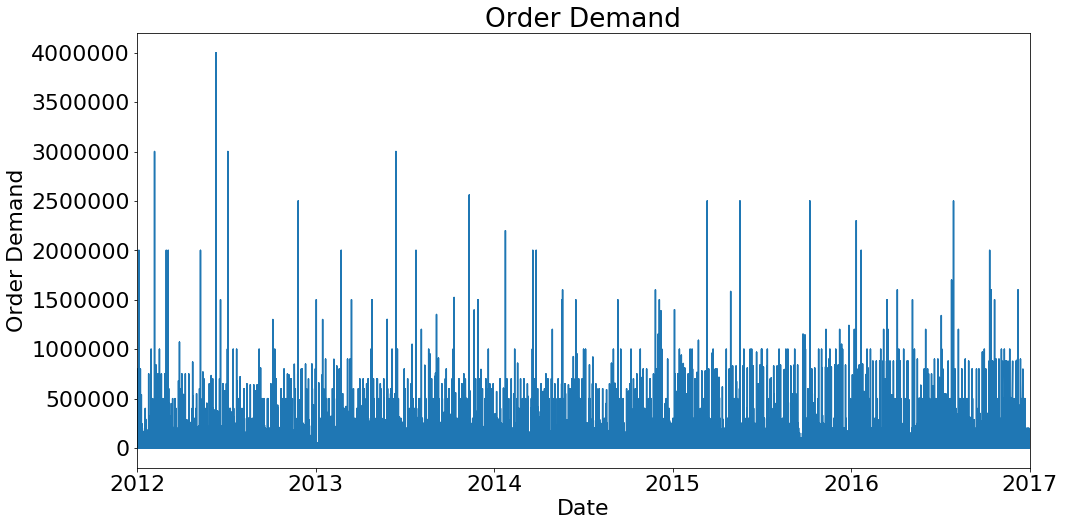

In [15]:
# Plot demand data for entire dataset

# Sort by date first for plotting
df = df.sort_values('Date')

# Set x & y
x = df.Date
y = df.Order_Demand

# Formatting for plots
font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 22}
plt.rc('font', **font)

# Plot
plt.figure(figsize=(16,8))
plt.plot(x, y)

# Title & axis labels
plt.title('Order Demand')
plt.xlabel('Date')
plt.ylabel('Order Demand')

# Set x-axis limits (low demand data for 2011 - may be able to remove this year)
plt.xlim([datetime.date(2012, 1, 1), datetime.date(2017, 1, 1)]);

We can see a really big spike mid 2012. I'm curious why. Perhaps there was a promotion or a new product launch or something similar. The demand seems pretty consistent through out the years with a slight drop in Q3 of 2014. 

Let's get a closer look at 2011 (not pictured here as I intentionally zoomed in on the axis for a better visual of the data). 

## Annual Trends

In [16]:
# Create a time series

# Set index to datetime column 
ts_df = df.set_index('Date')

# Select extra columns to drop (everything except 'Order_Demand')
to_drop = ['Product_Code','Warehouse','Product_Category']
# Drop columns
ts = ts_df.drop(to_drop, axis=1)

In [17]:
# Groupby year
ts_yr = ts.groupby(by=ts.index.year).sum()
ts_yr

,Order_Demand
Date,
2011,7936940
2012,945501449
2013,1011653360
2014,1067725423
2015,1097401540
2016,953826365
2017,294701


We can see that  2011 and 2017 are significantly lower. Let's find out why. First, we'll make a visual. 

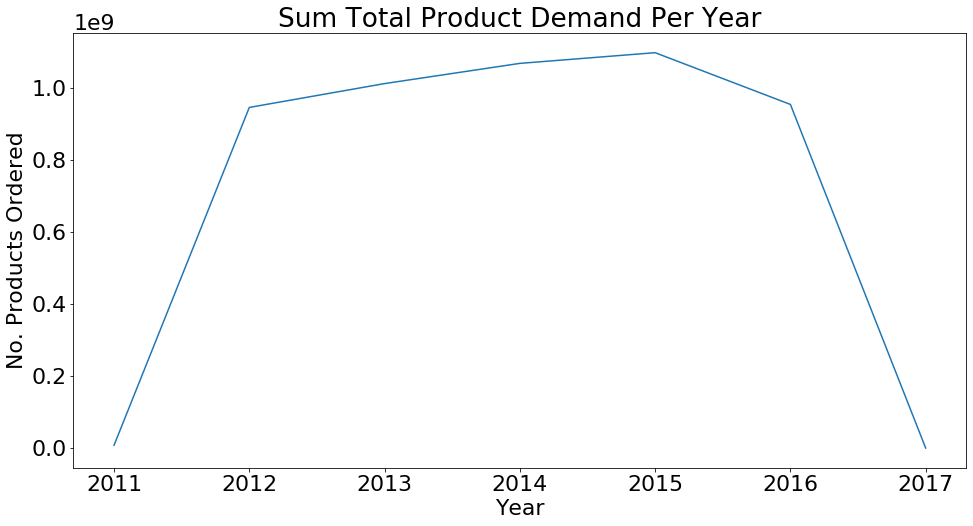

In [18]:
# Plot total product demand vs. year

# Set figure size
plt.figure(figsize=(16,8))
# Plot
plt.plot(ts_yr.index, ts_yr.Order_Demand)
# Title, x & y axis labels
plt.title('Sum Total Product Demand Per Year')
plt.ylabel('No. Products Ordered')
plt.xlabel('Year')
plt.show()

We again can see that demand was significantly lower in 2011 and 2017. I imagine these are either incomplete years or that 2011 was just the beginning, so it took time to gain momentum or perhaps not all of the warehouses were open yet. 

Let's take a closer look to be sure.

In [19]:
# Index time series by year 2011
ts['2011']

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,85000
2011-06-24,7000
2011-09-02,1250
...,...
2011-12-30,2750
2011-12-30,3000
2011-12-30,5000


We can see that for 2011 we do have all dates/the entire year present. This may indicate the beginning/when the warehouse(s) were brand new or just starting out. Now let's take a look at 2017.

In [20]:
# Index time series by year 2017
ts['2017']

,Order_Demand
Date,
2017-01-02,70
2017-01-03,200
2017-01-03,200
2017-01-03,2000
2017-01-04,1000
2017-01-04,3000
2017-01-04,8000
2017-01-04,10000
2017-01-04,1000


We can see that for this year the data only go through to January 9th, so 2017 is an incomplete year. 

We can see that for those years with data for every day, which are years 2012-2016, the order demand is pretty consistent, with 2012 and 2016 being only slightly lower, and 2017 representing only 9 days of the year. 

So let's go ahead and drop 2011 from our dataset as well as 2017 as it only has data for the first 9 days and is incomplete in terms of weeks or months (which we will be modeling in addition to days).

In [21]:
# Slice 2012 - 2016
ts_df = ts_df['2012':'2016']
# Preview
display(ts_df.head())
display(ts_df.tail())

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-01,Product_2166,Whse_S,Category_024,2
2012-01-02,Product_1431,Whse_S,Category_019,1000
2012-01-02,Product_1195,Whse_S,Category_019,5000
2012-01-02,Product_1195,Whse_S,Category_019,5000
2012-01-02,Product_1195,Whse_S,Category_019,5000


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-12-30,Product_0200,Whse_A,Category_007,20
2016-12-30,Product_1733,Whse_S,Category_030,1000
2016-12-30,Product_2009,Whse_S,Category_005,2000
2016-12-30,Product_1503,Whse_A,Category_019,2000
2016-12-30,Product_1419,Whse_A,Category_019,2300


Looks great! Next let's see what's going on with our warehouses and if there are any observable trends, patterns or insights. 

## Warehouse Demand


In [22]:
# Group by warehouse and sum order demand
wh_demand = ts_df.groupby(by=['Warehouse']).sum().round().sort_values(by=['Order_Demand'], ascending=False)
wh_demand

,Order_Demand
Warehouse,
Whse_J,3318744420
Whse_S,1031630352
Whse_C,580391083
Whse_A,145342282


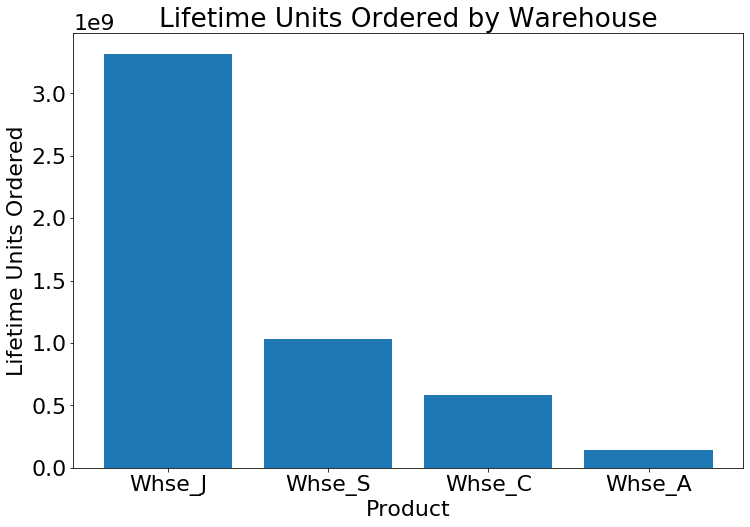

In [101]:
# x-labels
labels = wh_demand.index
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = wh_demand.Order_Demand

# Plot 
# Set figure
plt.figure(figsize=(12,8))
# Prevent extra whitespace 
plt.margins(0.05)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels)
plt.title('Lifetime Units Ordered by Warehouse')
plt.ylabel('Lifetime Units Ordered')
plt.xlabel('Product')
plt.show()

Let's look at the total percentage of order demand each warehouse represents.

In [24]:
### Calculate Percentages ###

# Warehouses
whs = ['Whse_J','Whse_S','Whse_C','Whse_A']
# Calc total demand
tot_demand = wh_demand.Order_Demand.sum()
print("Percent of Total Order Demand: \n")
# Calc percentages
for wh in whs:
    demand = wh_demand[wh_demand.index == wh].Order_Demand.values[0]
    percent_demand = (demand/tot_demand)*100
    print(wh + ": {:.2f}".format(percent_demand) + "%")

Percent of Total Order Demand: 

Whse_J: 65.38%
Whse_S: 20.32%
Whse_C: 11.43%
Whse_A: 2.86%


We can see here that Warehouse J has the most demand by a significant amount (more than 3x the following warehouse). This could be the largest warehouse. While Warehouse A represents the smallest amount at less than 3% of total order demand (sum of all units ordered). 

Let's take a closer look at the summary statistics by warehouse.

In [25]:
# Summary statistics by warehouse 
ts_df.groupby(by=['Warehouse']).describe().round()

Order_Demand                                                \
                 count     mean      std  min    25%     50%     75%   
Warehouse                                                              
Whse_A        115755.0   1256.0   4680.0  1.0   15.0   100.0  1000.0   
Whse_C         42066.0  13797.0  59263.0  1.0  100.0  1000.0  6000.0   
Whse_J        709437.0   4678.0  21901.0  1.0   25.0   500.0  2000.0   
Whse_S         87390.0  11805.0  64984.0  1.0   31.0   500.0  4000.0   

                      
                 max  
Warehouse             
Whse_A      345200.0  
Whse_C     3000000.0  
Whse_J     3000000.0  
Whse_S     4000000.0

Warehouse J has the most orders. Warehouse J also has the highest product demand. Warehouse A interestingly has the second highest orders, however it has the lowest product demand, making up just 2.8% of all units ordered.

This is interesting. It would mean perhaps that Warehouse A fulfills a high volume of small orders.

Let's visualize these here. We had to use log order demand as the data are spread over a very large range, which causes a lot of outliers.

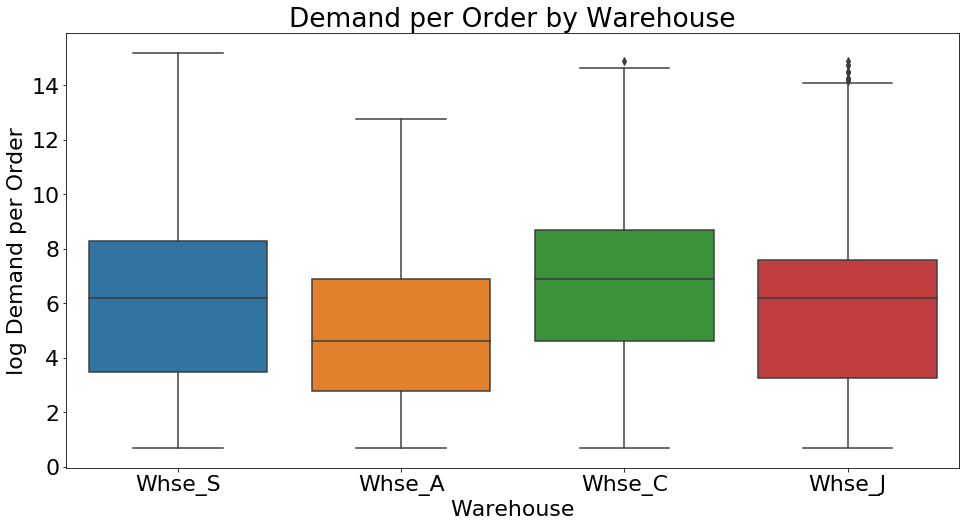

In [26]:
# Set figure size
plt.figure(figsize=(16,8))
# Box plot
sns.boxplot(ts_df['Warehouse'], np.log1p(ts_df['Order_Demand']))
# Title & labels
plt.title('Demand per Order by Warehouse')
plt.ylabel('log Demand per Order')
plt.show()

As we could see in the summary statistics and can also see in our plot here, Warehouses C and S actually have the highest average demand (product count) per order.

This is interesting as Warehouse J has the highest total product demand. Warehouse A has the lowest total product demand, however it has the highest number of orders. Additionally as just discussed, Warehouses C and S have the highest average product demand per order.

I would be curious to know how big these warehouses are, who they service (who their customers are) and what types of products they carry as well as what metropolitan or otherwise areas they are located in. 

## Products

### Product Count

Let's see how many products there are in total.

In [27]:
print(f"There are {len(ts_df.Product_Code.unique())} products")

There are 2157 products


Let's now take a look at the demand.

### Product Demand

We're going to sum lifetime product demand by product code and then preview it before visualizing. 

In [28]:
# Group by product code
prod_sum_demand = ts_df.groupby(by=["Product_Code"]).sum()
# Sort descending 
prod_sum_demand = prod_sum_demand.sort_values(by='Order_Demand', ascending=False)
# Take a look at the top 20
print("Top 20 Products:")
display(prod_sum_demand[0:20])

Top 20 Products:


,Order_Demand
Product_Code,
Product_1359,470532000
Product_1248,287924000
Product_0083,210415000
Product_1341,166411000
Product_1295,122447800
Product_1241,115979000
Product_1245,102337000
Product_1286,101346000
Product_1432,96869000


The top products appear to start out pretty high, possibly exponential and then taper out to a slower more linear decrease. 

Let's go ahead and plot the top 100 products so we can observe the trend visually. 

### Top 100

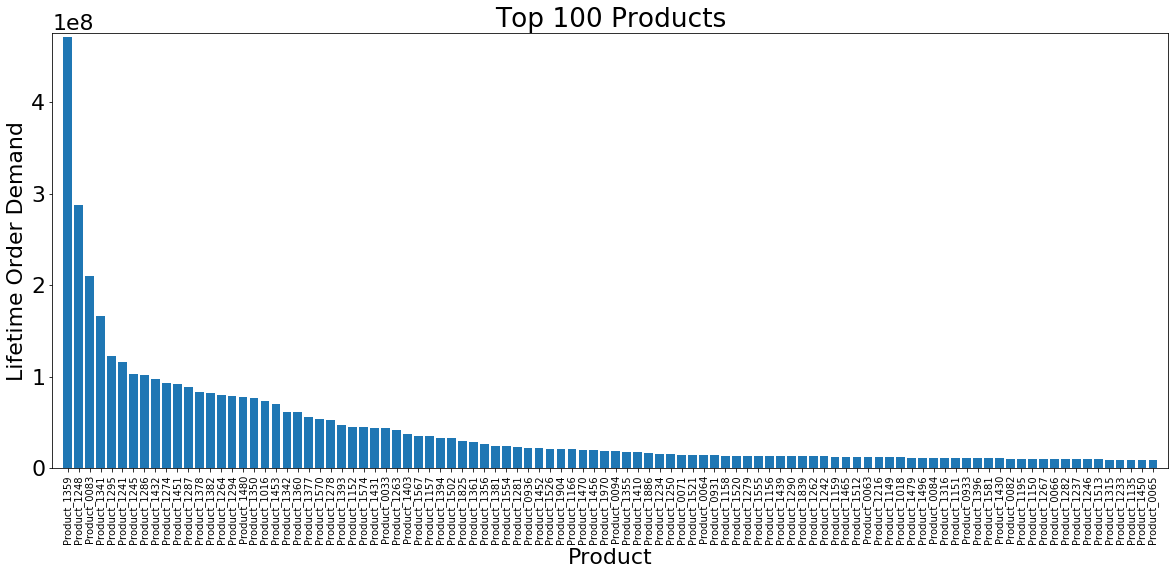

In [29]:
# x-labels
labels = prod_sum_demand.index[0:100]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:100]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=10)
plt.title('Top 100 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

We can see how much the demand for products tapers off. Considering this plot shows lifetime demand as well as only the top 100 out of over 2000, there may be many products with demand lower than what would justify stocking or keeping the product on the floor. 

Let's take a closer look at that.

In [30]:
# Print 10 lowest demand products
prod_sum_demand.tail(10)

,Order_Demand
Product_Code,
Product_1793,26
Product_0466,23
Product_0638,22
Product_0633,21
Product_0244,20
Product_1863,19
Product_2151,5
Product_0465,3
Product_1703,2


The manufacturer could most likely save costs by freeing up floor space with the elimination of lower demand products. This would make space for more in-demand products and perhaps new products. Or perhaps even downsizing of the facility and staff to only optimize for top producing products.

While this isn't the main focus of this study, I will include it as a recommendation in the future work section. 

### Top 50

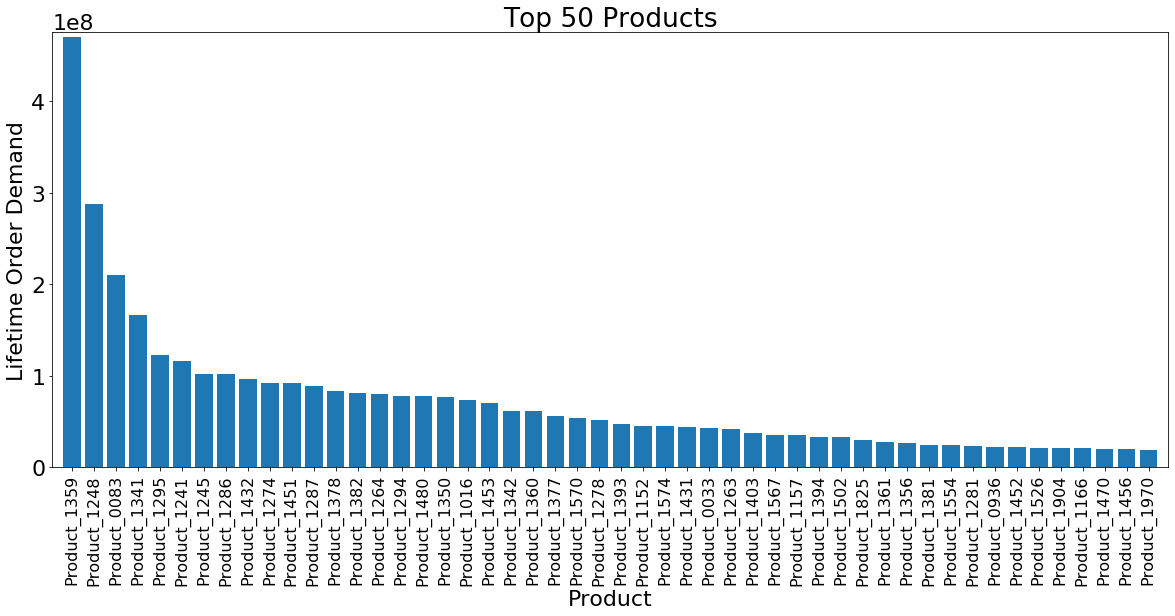

In [31]:
# x-labels
labels = prod_sum_demand.index[0:50]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:50]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Top 50 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

### Discussion

**Low Demand Inventory**

We could see in this section visually that a small percentage of available products make up a very large proportion of orders. If we had more detailed information such as profits from each product, we could do a more detailed analysis here to make suggestions on which products to cut from which warehouses.

In an even more detailed analysis it would be good to know footprint of the warehouse as well as number of employees and cost of employees so we could see where things could be culled down and streamlined. How much money can be saved and profits increased. 

If warehouses were to focus on fewer products which make up the greatest amount of orders/profit, could they then hold more stock of the most popular product and increase demand in other ways, such as advertising and saving money on larger purchase orders/more stock/inventory held? 

As this analysis is focused on predicting demand, we will focus on that for now, but will mention the above in future work.

**Top Demand Inventory**

For now let's focus on first modeling and predicting demand for the top most ordered product, and then the model or model-building process can be applied to other products.

Since a warehouse is most likely to run out of the most in-demand product and it is imagined that this would also be one of the most highly profitable products, it makes sense that we would focus on the most ordered product(s) first as these would be the most high-impact products.

### Top Product

In [32]:
# Take a look at top product
top_prod = ts_df[ts_df.Product_Code == 'Product_1359']
# Sort rows by date
top_prod = top_prod.sort_values(by=['Date'])
# Preview
top_prod.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-05,Product_1359,Whse_J,Category_019,100000
2012-01-05,Product_1359,Whse_J,Category_019,1000
2012-01-05,Product_1359,Whse_J,Category_019,300000
2012-01-05,Product_1359,Whse_J,Category_019,5000
2012-01-05,Product_1359,Whse_J,Category_019,10000


Let's look at total demand for our top product. 

In [33]:
top_prod_demand = top_prod.groupby(by=['Warehouse']).sum().round().sort_values(by=['Order_Demand'], ascending=False)
top_prod_demand

,Order_Demand
Warehouse,
Whse_J,470532000


The top product is only at Warehouse J, which was our highest producing warehouse for total order demand. 

Let's look at demand for their other products. 

#### Warehouse J

Products at Warehouse J. 

In [34]:
# Index by Whse_J
whse_j_prod_demand = ts_df[ts_df.Warehouse == 'Whse_J'].groupby(by=["Product_Code"]).sum().sort_values(by=['Order_Demand'], ascending=False)
# Preview top 20
whse_j_prod_demand.head(20)

,Order_Demand
Product_Code,
Product_1359,470532000
Product_1248,287924000
Product_1295,122447800
Product_1286,101346000
Product_1274,92478000
Product_1451,91749000
Product_1287,88433000
Product_1378,83272100
Product_1382,81537500


In [35]:
# Calculate number of products at warehouse J
tot_prods_whse_j = len(prod_sum_demand)
print(f"N Products at Whse J: {tot_prods_whse_j}")

N Products at Whse J: 2157


In [36]:
# Percentage of all Whse_J product demand
perc_j = ((whse_j_prod_demand[0:100].sum()/whse_j_prod_demand.sum()).values[0])*100
print("{:.2f}".format(perc_j) + "%")

86.54%


The top 100 products make up 86.54% of the demand. 

In [37]:
# Calc total demand
tot_demand = whse_j_prod_demand.Order_Demand.sum()
print("Percent of Total Order Demand at Warehouse J: \n")

# Calc percent
demand = whse_j_prod_demand[whse_j_prod_demand.index == 'Product_1359'].Order_Demand.values[0]
percent_demand = (demand/tot_demand)*100
print("Product_1359: {:.2f}".format(percent_demand) + "%")

Percent of Total Order Demand at Warehouse J: 

Product_1359: 14.18%


In [38]:
# Group by product code
prod_sum_demand = whse_j_prod_demand.groupby(by=["Product_Code"]).sum()
# Sort descending 
prod_sum_demand = prod_sum_demand.sort_values(by='Order_Demand', ascending=False)
# Take a look at the top 20
print("Top 20 Products:")
display(prod_sum_demand[0:20])

Top 20 Products:


,Order_Demand
Product_Code,
Product_1359,470532000
Product_1248,287924000
Product_1295,122447800
Product_1286,101346000
Product_1274,92478000
Product_1451,91749000
Product_1287,88433000
Product_1378,83272100
Product_1382,81537500


Let's visualize these like we did for all warehouses.

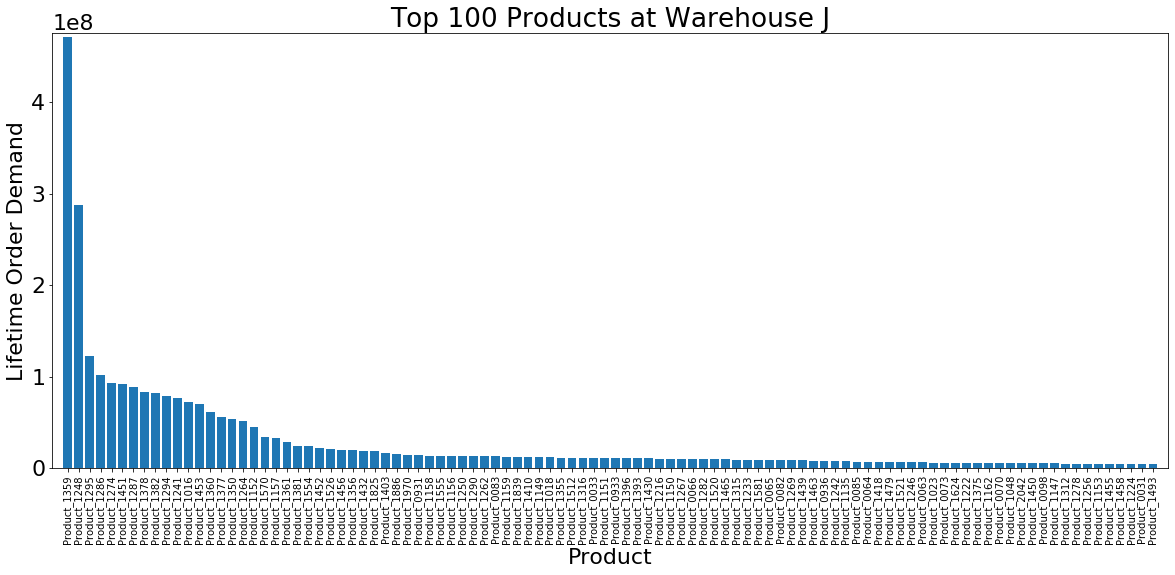

In [39]:
# x-labels
labels = prod_sum_demand.index[0:100]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:100]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=10)
plt.title('Top 100 Products at Warehouse J')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

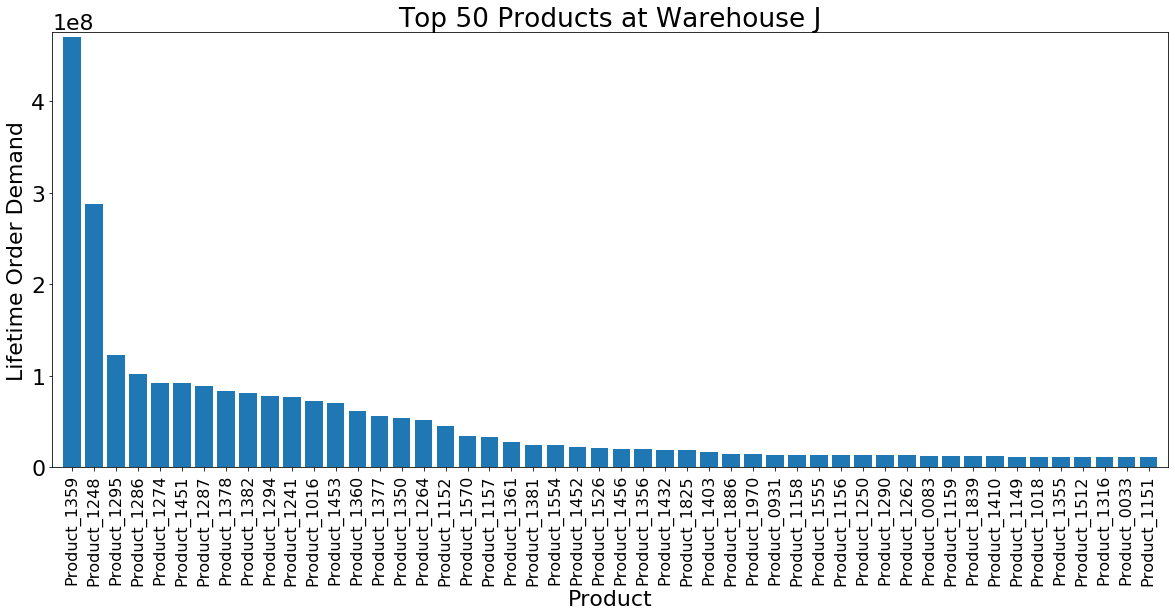

In [40]:
# x-labels
labels = prod_sum_demand.index[0:50]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:50]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Top 50 Products at Warehouse J')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

We can see a similar trend here as we did for all warehouses. There are top products, and then it drops off drastically, with demand for the majority of products being quite low comparatively. 

#### Groupby Day

We already eliminated return orders, which are negative demand. Now we're going to group by day, and if there are any days where no products were ordered, we're going to add 1 so we can calculate our cost function, **MAPE**.

In [41]:
top_prod_day = top_prod.groupby(pd.Grouper(freq='D')).sum()
top_prod_day[top_prod_day.Order_Demand == 0]

,Order_Demand
Date,
2012-01-07,0
2012-01-08,0
2012-01-09,0
2012-01-14,0
2012-01-15,0
...,...
2016-12-17,0
2016-12-18,0
2016-12-23,0


In [42]:
top_prod_day.describe().round()

,Order_Demand
count,1820.0
mean,258534.0
std,296815.0
min,0.0
25%,0.0
50%,196000.0
75%,394000.0
max,2252000.0


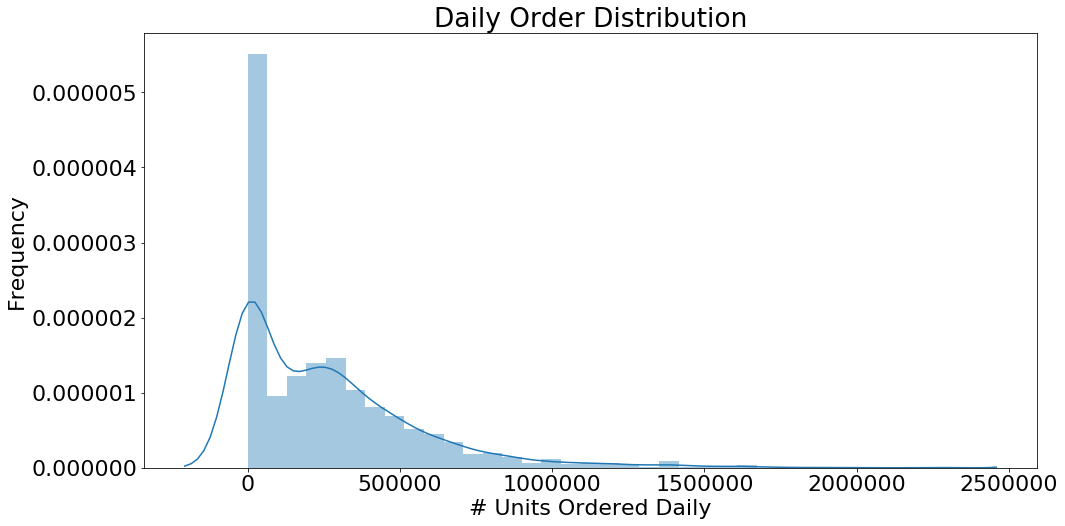

In [43]:
plt.figure(figsize=(16,8))
sns.distplot(top_prod_day)
plt.title('Daily Order Distribution')
plt.xlabel('# Units Ordered Daily')
plt.ylabel('Frequency')
plt.show()

When we group by day we can see that there are a lot of days where no orders for the top product were made. We're going to change those to 1 so we can calculate MAPE.

In [44]:
# Calculate % of data with daily product demand <= 0 
print('{:.2f}%'.format(len(top_prod_day[top_prod_day.Order_Demand ==0 ])/len(top_prod_day)*100))

32.53%


This is a pretty significant amount, which makes me wonder if this is following a M-F trend. That wouldn't explain all of it, however 28.57% of the week is Saturday and Sunday. 

In [45]:
# Add 1 to 0 days for MAPE calculation
top_prod_day.Order_Demand[top_prod_day.Order_Demand == 0] = 1

## Product Category

Let's take a closer look at the highest demand product category.

In [46]:
# Group by product category & sum order demand
top_cat = ts_df.groupby(by=['Product_Category']).sum()
# Sort descending by order demand
top_cat = top_cat.sort_values(by=['Order_Demand'], ascending=False)
# Preview top 5
top_cat.head()

,Order_Demand
Product_Category,
Category_019,4202550692
Category_006,394045658
Category_005,194919040
Category_007,127502866
Category_028,47728372


We can see that Category 19 is the most demanded product. This makes sense as it is the category that our most in-demand product belongs to.  Let's visualize this!

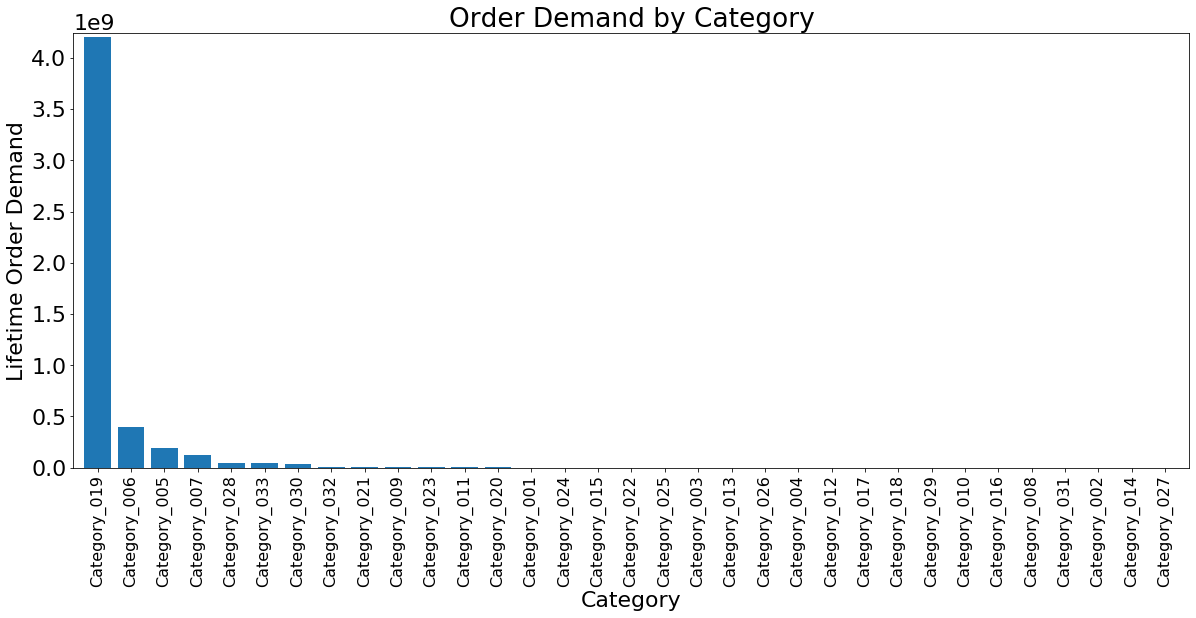

In [47]:
# x-labels
labels = top_cat.index
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = top_cat.Order_Demand

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Order Demand by Category')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Category')
plt.show()

Category 19 is by far the most in demand product. This is also the category that our top demand product belongs to. 

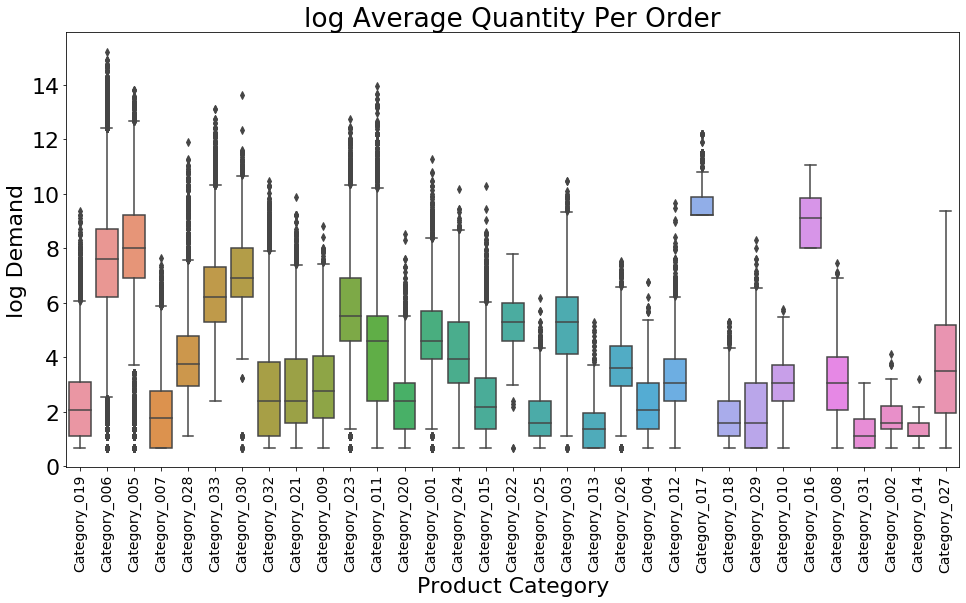

In [48]:
# Set figure size
plt.figure(figsize=(16,8))
# Box plot
sns.boxplot(ts_df['Product_Category'], np.log1p(ts_df['Order_Demand']))
plt.xticks(products, labels, rotation = 90, fontsize=14)
plt.title('log Average Quantity Per Order')
plt.xlabel('Product Category')
plt.ylabel('log Demand')
plt.show()

This plot is interesting, because what it shows is that our top producing category (Category 19) actually has fewer demand per order than many other product categories. This would indicate that it is ordered both frequently and perhaps from many different customers. Whatever the products in this category may be it seems they are used by many and frequently. 

# Modeling 

## Build & Fit Baseline Models

### Accuracy Metric

**MAPE**

In order for our model to calculate MAPE, the Order Demand values must be greater than 0. So as before, we're going to add 1 to days with 0 orders. 

The reason we're using MAPE, rather than RMSE or simply MAE, is because RMSE and MAE are proportional to the regular demand of a product, which would vary greatly as we apply our model to different products. To keep our accuracy score relatable and relevant amongst different products that we apply our model to, MAPE, which represents percentage, is the best metric to use. 

**Negative Demand**

Negative demand indicates returns were made that day. However, we don't know if the returns logged that day are immediately available to be shipped out. Therefore they are not useful in knowing how much product to have on hand to meet demand.

This is a common issue in inventory demand time-series forecasting for warehouses. 

**Build Function**

First we'll define our function to fit our baseline models and print out our predictions as well as our plot components.

In [126]:
# Update formatting for plots
font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 12}
plt.rc('font', **font)

# Define function
def ts_model(ts_df, freq='D', periods=365):
    '''
    Function takes in time series data frame and returns model 
    forecast, accuracy score, time series forecast with changepoints,
    and plot components.
    
    Inputs:
        ts_df: Time series data frame
        freq: Frequency to group data by 
            (default='D') e.g. 'D','W','M'
        periods: Periods to forecast into the future
            (default=365) e.g. 365, 52, 12
            in relation to the frequency
            
    Outputs:
        Returns: 
            Forecast: Data frame of predictions
        Prints: 
            Accuracy Score: RMSE
            Time Series Forecast: Plot
            Plot Components: Plots showing trends:
                overall trend, weekly and monthly    
    '''
    
    ### Group data by Frequency ###
    
    # Group by frequency
    top_prod = ts_df.groupby(pd.Grouper(freq=freq)).sum()

    # Change zeros to 1 for mape calculation
    top_prod.Order_Demand[top_prod.Order_Demand == 0] = 1

    ### Convert to fbprophet format ###

    # Move datetime index to column
    top_prod.reset_index(inplace=True)
    # Rename columns for fbprophet format
    top_prod = top_prod.rename(columns={'Date':'ds', 'Order_Demand': 'y'})

    ### Instantiate & Fit Model ###

    # Instantiate model
    m = Prophet(interval_width=0.95)
    # Fit model
    m.fit(top_prod)

    ### Forecast & Predict ###

    # Forcasting 
    future = m.make_future_dataframe(periods=periods, freq=freq)
    # Predict
    forecast = m.predict(future)

    ### Calculate RMSE ###

    # Residuals
    res = top_prod.y - forecast.yhat[:-periods]
    # Residual sum of squares
    rss = np.sum(np.square(res))
    # Mean squared error
    mse = rss/len(res)
    # Root mean squared error
    rmse = np.sqrt(mse)
    
    if freq=='W':
        rmse = rmse/7
    elif freq=='M':
        rmse = rmse/12
    
    # Print
    print(f"RMSE: {rmse.round()} \n")

    ### Plot Time Series & Components ###

    # Plot forecast
    print('Time Series Forecast:')
    figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
    # Add change points
    a = add_changepoints_to_plot(figure1.gca(), m, forecast)
    plt.show()
    # Plot components
    print('Time Series Components:')
    figure2 = m.plot_components(forecast)
    plt.show()

    return forecast

### Daily 

Apply function to model daily demand forecast.

RMSE: 1147865.0 

Time Series Forecast:


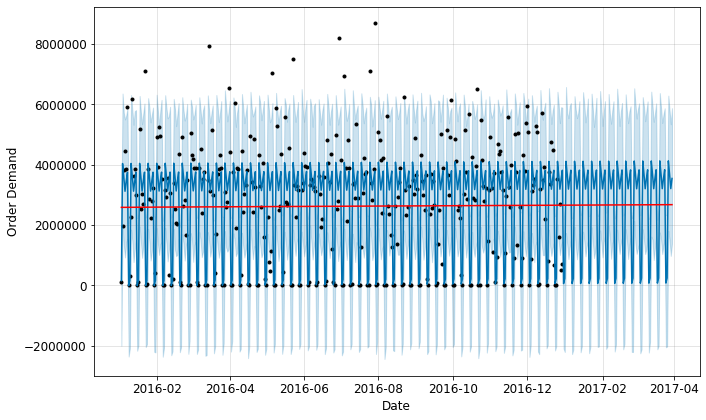

Time Series Components:


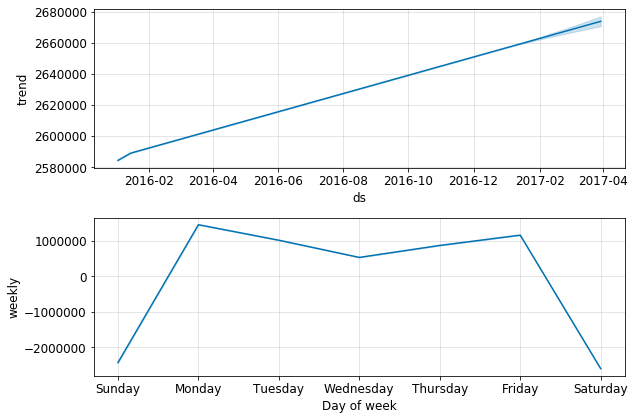

In [108]:
daily_forcast = ts_model(ts_df, freq='D', periods=90)

In [194]:
y_train['y'] = top_prod['Order_Demand'].values

In [171]:
top_prod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2012-01-01 to 2016-12-30
Freq: D
Data columns (total 1 columns):
Order_Demand    1826 non-null int64
dtypes: int64(1)
memory usage: 28.5 KB


**RMSE: 1148398.0**

**Trend**

We can see there are a series of changepoints surrounding the beginning of 2015. This relates to the overall trend we can see in the decomposition trend plot. 

The trend increases linearly peaking in 2015 and then linearly decreases.

This could have been the introduction of a new product that peaked before trending downward in its product lifecycle. This could have been a change in industry trends. This could have been due to competitor product(s). This could have been the result of a marketing or promotional campaign. There are many possibilities.

We don't have much information on this dataset other than it coming from a manufacturer with four worldwide warehouses. 

**Weekly**

It appears there is a peak in demand/orders on Tuesday, followed closely by Monday, with Wednesday being the slowest day and negative demand (which could indicate returns) on the weekends. This seems to follow a Monday - Friday business day schedule. 

**Yearly**

There appear to be peaks in December and February, before and after the holidays and new year, with the lowest amount of demand in January. 

### Weekly 

Apply function to model weekly demand forecast.

In [197]:
y_train.head().round()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2012-01-01,2530823.0,-2737022.0,1523696.0,2530823.0,2530823.0,-3286018.0,-3286018.0,-3286018.0,-2520302.0,-2520302.0,-2520302.0,-765716.0,-765716.0,-765716.0,0.0,0.0,0.0,-755195.0,2
1,2012-01-02,2531258.0,835242.0,5452882.0,2531258.0,2531258.0,567695.0,567695.0,567695.0,1318179.0,1318179.0,1318179.0,-750484.0,-750484.0,-750484.0,0.0,0.0,0.0,3098953.0,680277
2,2012-01-03,2531693.0,996995.0,5572274.0,2531693.0,2531693.0,783040.0,783040.0,783040.0,1508219.0,1508219.0,1508219.0,-725179.0,-725179.0,-725179.0,0.0,0.0,0.0,3314733.0,1645257
3,2012-01-04,2532128.0,303520.0,4648110.0,2532128.0,2532128.0,-122984.0,-122984.0,-122984.0,567175.0,567175.0,567175.0,-690158.0,-690158.0,-690158.0,0.0,0.0,0.0,2409145.0,1295861
4,2012-01-05,2532563.0,507644.0,5054826.0,2532563.0,2532563.0,318396.0,318396.0,318396.0,964365.0,964365.0,964365.0,-645969.0,-645969.0,-645969.0,0.0,0.0,0.0,2850960.0,8941774


RMSE: 4063079.0 

Time Series Forecast:


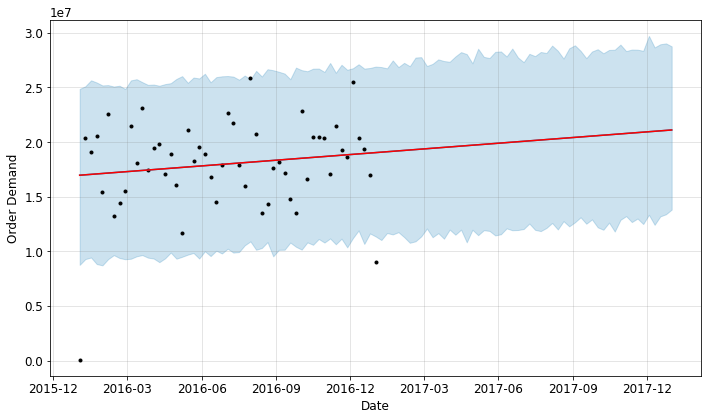

Time Series Components:


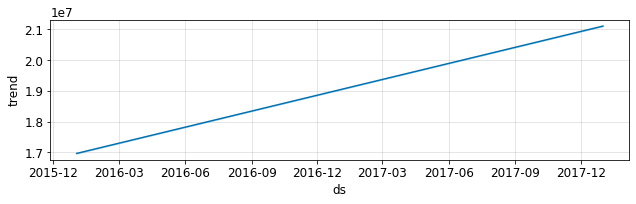

In [116]:
weekly_forecast = ts_model(ts_df, freq='W', periods=52)

In [151]:
pd.append(y_train, top_prod, left_index=False, right_index=False, how='left')

AttributeError: module 'pandas' has no attribute 'append'

In [200]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train.y, y_train.yhat)).round()

1148765.0

**RMSE: 3407993.0**

We can see the same trends here as the daily projections, however the RMSE for weekly is much higher (almost 300%) than the daily. Therefore daily demand is a more accurate prediction metric for this model. 

### Monthly 

Apply function to model monthly demand forecast.

RMSE: 5008620.0 

Time Series Forecast:


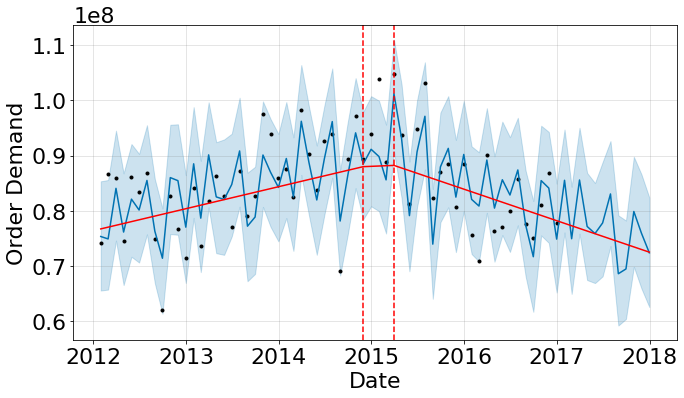

Time Series Components:


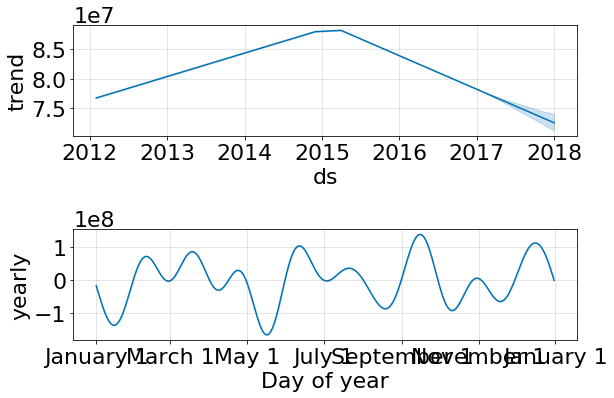

In [74]:
monthly_forecast = ts_model(ts_df, freq='M', periods=12)

**RMSE: 4998711.0**

We can see the 2015 changepoint most clearly here. One thing to note is that by looking on a monthly basis rather than daily or weekly, the yearly trends have shifted.

We can also see the RMSE is the highest for this model.

**Model Selection**

With the lowest RMSE by a significant amount, we will go with daily forecasting for our time series model, and do our best to tune it below.

## Performance Metrics

While we have looked at RMSE, we will also crossvalidate and perform a gridsearch to find optimal values for our hyperparameters. We will plot RMSE and take a look at MAE as well (mean absolute error). 

### Crossvalidation

Min MAPE: 1.0
Max MAPE: 2.0


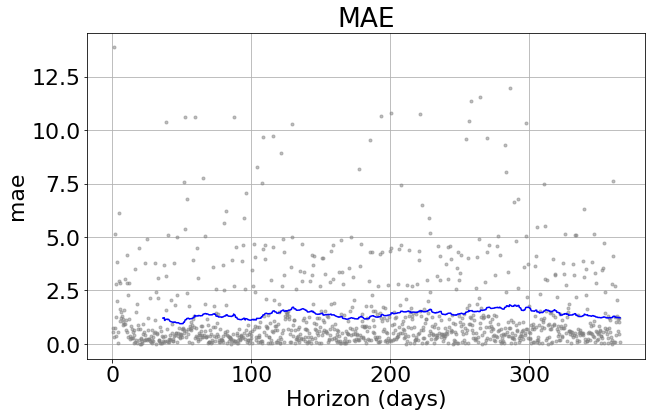

In [86]:
### Cross validation ##

# Group by day
top_prod = ts_df.groupby(pd.Grouper(freq='D')).sum()
# Change 0 to 1 for MAPE calculation
#top_prod.Order_Demand[top_prod.Order_Demand == 0] = 1
top_prod.Order_Demand = np.log(top_prod.Order_Demand + 1)
# Move datetime index to column
top_prod.reset_index(inplace=True)
# Rename columns for fbprophet format
top_prod = top_prod.rename(columns={'Date':'ds', 'Order_Demand': 'y'})

### Instantiate & Fit Model ###

# Instantiate model
m = Prophet(interval_width=0.95)
# Fit model
m.fit(top_prod)


top_prod_d_cv = cross_validation(m, initial='365.25 days', period='365.25 days', horizon = '365.25 days')

# Performance metrics
top_prod_p = performance_metrics(top_prod_d_cv)

# MAPE
min_mape = top_prod_p.sort_values(by=['mae']).head(1)['mae'].round().values[0]
max_mape = top_prod_p.sort_values(by=['mae'], ascending=False).head(1)['mae'].round().values[0]

# Print
print(f'Min MAPE: {min_mape}')
print(f'Max MAPE: {max_mape}')

### Plot Metrics ###

fig = plot_cross_validation_metric(top_prod_d_cv, metric='mae')#, rolling_window=.2)
#plt.ylim([0,1000])
plt.title('MAE')
plt.show()

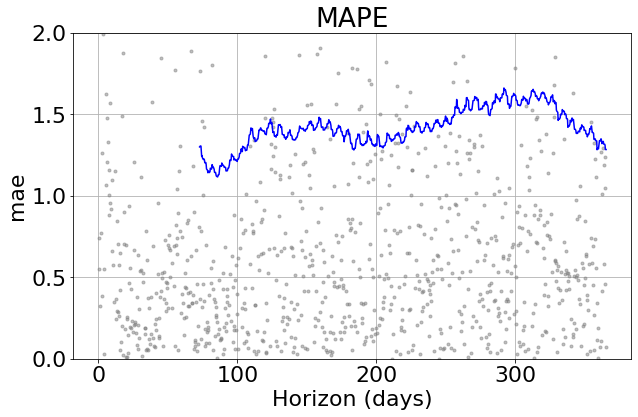

In [88]:
fig = plot_cross_validation_metric(top_prod_d_cv, metric='mae', rolling_window=.2)
plt.ylim([0,2])
plt.title('MAPE')
plt.show()

In [80]:
top_prod_p

,horizon,mse,rmse,mae,coverage
0,36 days 06:00:00,4.580602,2.140234,1.208818,0.935780
1,36 days 12:00:00,4.577982,2.139622,1.204999,0.935780
2,36 days 18:00:00,4.573038,2.138466,1.199095,0.935780
3,37 days 06:00:00,4.697891,2.167462,1.230172,0.935780
4,37 days 12:00:00,2.936298,1.713563,1.106322,0.944954
...,...,...,...,...,...
983,363 days 18:00:00,3.787484,1.946146,1.231541,0.935780
984,364 days 06:00:00,3.767602,1.941031,1.221611,0.935780
985,364 days 12:00:00,3.778554,1.943850,1.227482,0.935780
986,364 days 18:00:00,3.783830,1.945207,1.230794,0.935780


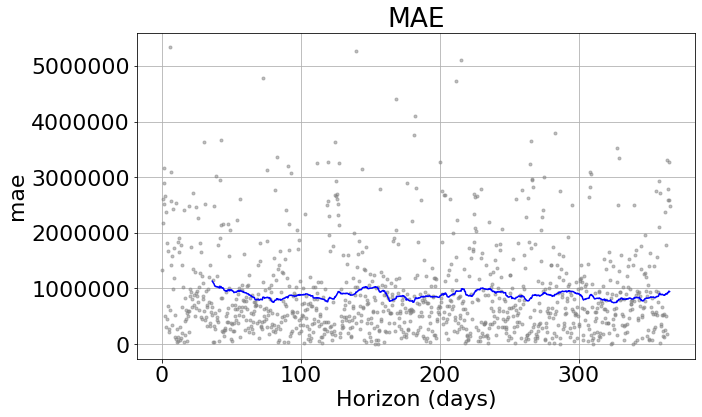

In [71]:
fig = plot_cross_validation_metric(top_prod_d_cv, metric='mape')#, rolling_window=.2)
#plt.ylim([0,1000])
plt.title('MAPE')
plt.show()

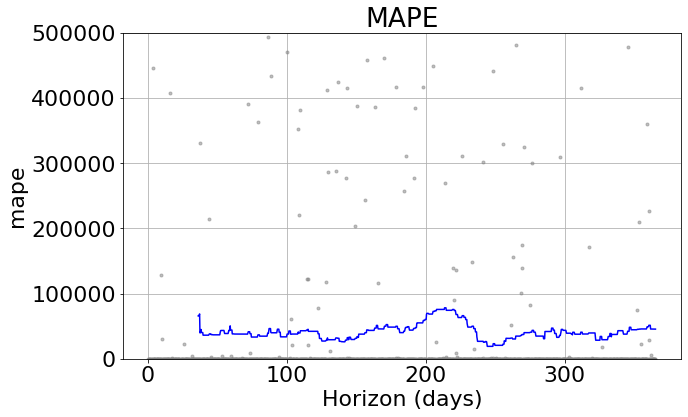

In [72]:
### Plot Metrics ###

fig = plot_cross_validation_metric(top_prod_d_cv, metric='mape')#, rolling_window=.2)
plt.ylim([0,500000])
plt.title('MAPE')
plt.show()

We can see here that the prediction error (RMSE) for our model ranges from 961842.0 - 1463890.0 depending on the horizon or days into the future that we're predicting.

Let's take a closer look.

In [54]:
# Prediction metrics for min RMSE
top_prod_p.sort_values(by=['rmse']).head(1)

,horizon,mse,rmse,mae,coverage
867,325 days 06:00:00,9.346957e+11,966796.635507,743950.247162,0.954128


We can see that the optimal prediction horizon is 324 days. Therefore we can say that our model most accurately predicts 324 days into the future. 

### Hyperparameter Tuning

In [55]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [3, 5, 10, 15],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(top_prod)  # Fit model with given params
    df_cv = cross_validation(m, horizon='365.25 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                        3  1.456160e+06
1                     0.001                        5  1.460473e+06
2                     0.001                       10  1.459184e+06
3                     0.001                       15  1.459226e+06
4                     0.010                        3  1.299201e+06
5                     0.010                        5  1.303708e+06
6                     0.010                       10  1.307471e+06
7                     0.010                       15  1.298240e+06
8                     0.100                        3  1.262311e+06
9                     0.100                        5  1.261328e+06
10                    0.100                       10  1.260775e+06
11                    0.100                       15  1.261819e+06
12                    0.500                        3  1.238931e+06
13                    0.500                        5  1.239800

In [56]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 3}


None of these appear to improve the model as we can see with the relatively RMSE values. We can however test them out. 

## Tuned Model

,ds,trend,yhat,yhat_lower,yhat_upper
2145,2017-11-15,2482791.0,3118608.0,941301.0,5335291.0
2146,2017-11-16,2482509.0,3550344.0,1254281.0,5605172.0
2147,2017-11-17,2482227.0,3531276.0,1211410.0,5756076.0
2148,2017-11-18,2481944.0,-122169.0,-2074515.0,1977682.0
2149,2017-11-19,2481662.0,160422.0,-2203234.0,2352286.0


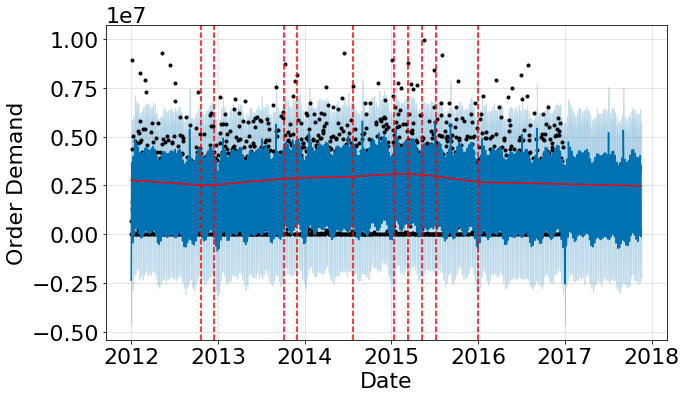

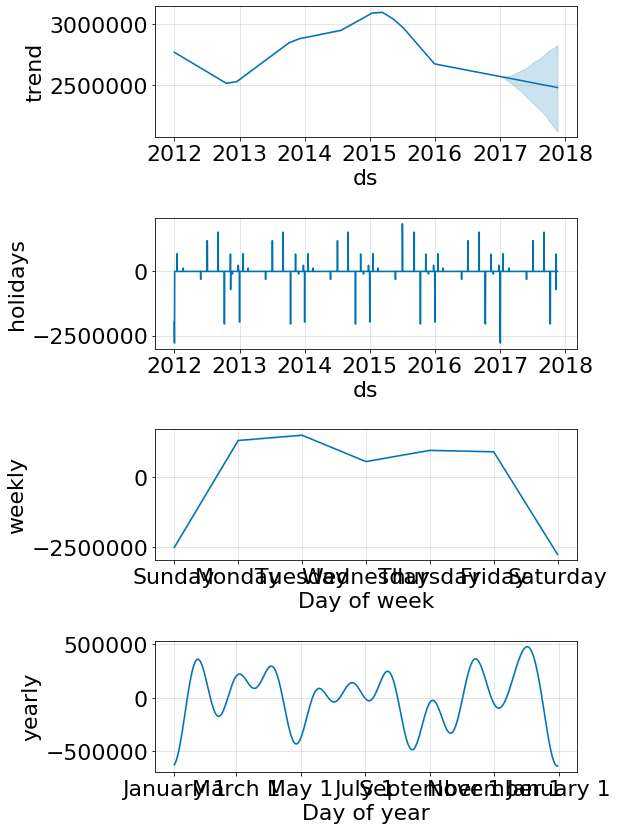

In [57]:
# Instantiate model with chosen hyperparameters
m = Prophet(interval_width = 0.95,
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            changepoint_prior_scale = 0.5,
            seasonality_prior_scale=10
            )

# Add holidays
m.add_country_holidays(country_name='US')
# Fit model
m.fit(top_prod)

# Forcast 324 days into the future
future = m.make_future_dataframe(periods=324, freq='D')
forecast = m.predict(future)

display(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].tail().round())

figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
a = add_changepoints_to_plot(figure1.gca(), m, forecast)
figure2 = m.plot_components(forecast)

We can really see in comparison to our trend plot how the changepoints have really captured the trend. We can see this did increase the undertainty, which could indicate that our model is overfitting due to our tuning. 

In [58]:
# Calculate RMSE
res = top_prod.y - forecast.yhat[:-324]
rss = np.sum(np.square(res))
mse = rss/len(res)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse.round()}")

RMSE: 1127155.0


We were able to improve the model slightly, by approximately 20,000 units per day more accurate, however we may be overfitting the model here. 

I'm curious now to see what the summary statistics are for daily demand of this product.

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-12-31,4.048514e+06,1.951847e+06,6.185837e+06,1235888,2013-12-30 06:00:00
1,2014-01-01,2.241099e+06,1.651120e+05,4.291980e+06,7740,2013-12-30 06:00:00
2,2014-01-02,3.550629e+06,1.438434e+06,5.697854e+06,971707,2013-12-30 06:00:00
3,2014-01-03,3.416264e+06,1.310574e+06,5.565591e+06,1410267,2013-12-30 06:00:00
4,2014-01-04,-6.686769e+04,-2.118509e+06,2.132594e+06,13000,2013-12-30 06:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1091,2016-12-26,3.095435e+06,6.683785e+05,5.428713e+06,3515181,2015-12-30 18:00:00
1092,2016-12-27,3.411023e+06,1.209098e+06,5.602745e+06,1596831,2015-12-30 18:00:00
1093,2016-12-28,2.331705e+06,7.798098e+04,4.603292e+06,2701983,2015-12-30 18:00:00
1094,2016-12-29,2.749278e+06,6.696487e+05,5.074354e+06,512302,2015-12-30 18:00:00
1095,2016-12-30,2.606261e+06,5.015769e+05,4.922753e+06,702950,2015-12-30 18:00:00


Min MAE:


,horizon,mse,rmse,mae,coverage
132,80 days 06:00:00,9.193271e+11,958815.490841,670313.522275,0.972477
133,80 days 12:00:00,9.197058e+11,959012.926812,671349.563395,0.972477
130,79 days 12:00:00,9.485381e+11,973929.196302,681323.798301,0.972477
129,79 days 06:00:00,9.486745e+11,973999.237925,681469.911046,0.972477
134,80 days 18:00:00,9.362435e+11,967596.755132,683394.668066,0.972477


Min RMSE:


,horizon,mse,rmse,mae,coverage
435,181 days 06:00:00,8.892669e+11,943009.479041,703926.826712,0.954128
433,180 days 12:00:00,8.923242e+11,944629.155555,706622.838078,0.954128
434,180 days 18:00:00,8.953497e+11,946229.201194,708832.369260,0.954128
132,80 days 06:00:00,9.193271e+11,958815.490841,670313.522275,0.972477
133,80 days 12:00:00,9.197058e+11,959012.926812,671349.563395,0.972477


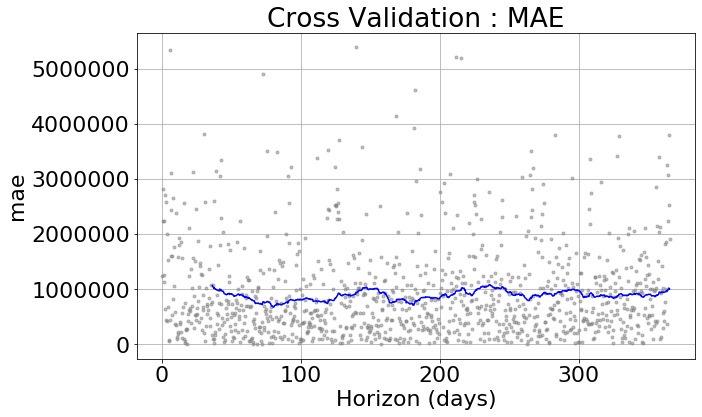

NameError: name 'top_prod_w_cv' is not defined

In [59]:
top_prod_d_cv = cross_validation(m, initial='365.25 days', period='365.25 days', horizon = '365.25 days')
display(top_prod_d_cv.head())
display(top_prod_d_cv.tail())

top_prod_p = performance_metrics(top_prod_d_cv)
print('Min MAE:')
display(top_prod_p.sort_values(by=['mae']).head())
print('Min RMSE:')
display(top_prod_p.sort_values(by=['rmse']).head())

fig = plot_cross_validation_metric(top_prod_d_cv, metric='mae')
plt.title('Cross Validation : MAE')
plt.show()
fig = plot_cross_validation_metric(top_prod_w_cv, metric='rmse')
plt.title('Cross Validation : RMSE')
plt.show()

# Conclusion

## Results

## Recommendations

## Future Work